In [2]:
import sys 
import os 
sys.path.append("./")
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

import SVM_smo as SVM 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC 
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
def train(X,y,mode):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X, y)
    y[y == 0] = -1
    X_train_shuffled, y_shuffled = shuffle(X_train_scaled,y,random_state=0)
    X_train,X_test,y_train,y_test = train_test_split(X_train_shuffled,y_shuffled,test_size = 0.1,random_state=0)
    
    if mode=='sk':
        svc = LinearSVC(random_state = 0)
        svc.fit(X_train,y_train)
        return confusion_matrix(y_test,svc.predict(X_test))

    if mode=='smo':
        
        
        # Set model parameters and initial values
        C = 1.0
        m = len(X_train)
        initial_alphas = np.zeros(m)
        initial_b = 0.0

        # Instantiate model
        model = SVM.SMOModel(X_train, y_train, C, SVM.gaussian_kernel,
                        initial_alphas, initial_b, np.zeros(m))

        # Initialize error cache
        initial_error = SVM.decision_function(model.alphas, model.y, model.kernel,
                                        model.X, model.X, model.b) - model.y
        model.errors = initial_error


        np.random.seed(0)
        output = SVM.train(model)
        return SVM.confusion_matrix(y_test,X_test,model)

# 1. biabetes dataset

In [3]:
import copy 

dataf = pd.read_csv('./Dataset/DataForClassification/2/pima-indians-diabetes.csv',header=None).values 
X_train =  dataf[:,:-1]
y = dataf[:,-1]

X_train_cp = copy.deepcopy(X_train)
y_cp = copy.deepcopy(y)

print("SCIKIT LEARN result : ")
print(train(X_train,y,'sk'))
print("SMO result : ")
print(train(X_train_cp,y_cp,'smo'))


SCIKIT LEARN result : 
[[48  9]
 [ 9 11]]
SMO result : 
[[23.  5.]
 [19. 30.]]


#  2. scikit - make_blobs

In [2]:
X_train, y = make_blobs(n_samples=1000, centers=2,
                        n_features=2, random_state=1)

print(train(X_train,y,'smo'))



[[51.  0.]
 [ 0. 49.]]


In [9]:
# Set model parameters and initial values
C = 1000.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance

# Instantiate model
model = SVM.SMOModel(X_train_scaled, y, C, SVM.linear_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = SVM.decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error


np.random.seed(0)
output = SVM.train(model)
print(SVM.confusion_matrix(model))

[[500.   0.]
 [  0. 500.]]


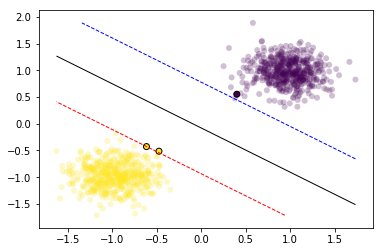

In [4]:
fig, ax = plt.subplots()
grid, ax = SVM.plot_decision_boundary(output, ax)

outlier

In [2]:
X_train, y = make_blobs(n_samples=1000, centers=2,
                        n_features=2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1
X_outlier = np.append(X_train_scaled, [0.1, 0.1])
X_outlier = X_outlier.reshape(X_train.shape[0]+1, X_train.shape[1])
y_outlier = np.append(y, -1)
C = 1.0
m = len(X_outlier)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SVM.SMOModel(X_outlier, y_outlier, C, SVM.linear_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = SVM.decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error


np.random.seed(0)
output = SVM.train(model)
print(SVM.confusion_matrix(model))

[[500.   0.]
 [  0. 501.]]


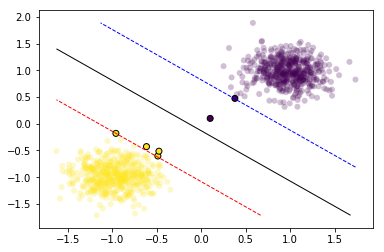

In [3]:
fig, ax = plt.subplots()
grid, ax = SVM.plot_decision_boundary(output, ax)

circle

In [7]:
X_train, y = make_circles(n_samples=500, noise=0.1,
                          factor=0.1,
                          random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1
# Set model parameters and initial values
C = 1.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SVM.SMOModel(X_train_scaled, y, C, SVM.gaussian_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = SVM.decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error


np.random.seed(0)
output = SVM.train(model)
print(SVM.confusion_matrix(model))

[[250.   0.]
 [  0. 250.]]


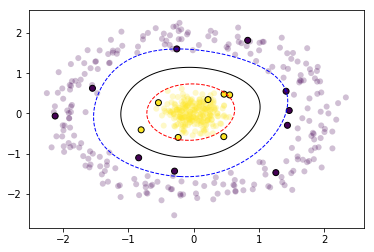

In [8]:
fig, ax = plt.subplots()
grid, ax = SVM.plot_decision_boundary(output, ax)

moons

In [9]:
X_train, y = make_moons(n_samples=500, noise=0.1,
                        random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1

# Set model parameters and initial values
C = 1.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SVM.SMOModel(X_train_scaled, y, C, SVM.gaussian_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = SVM.decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error


np.random.seed(0)
output = SVM.train(model)
print(SVM.confusion_matrix(model))

[[250.   0.]
 [  0. 250.]]


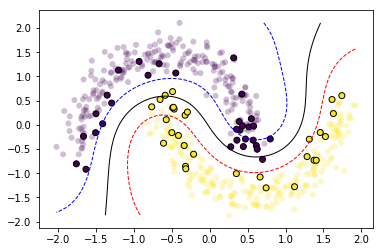

In [10]:
fig, ax = plt.subplots()
grid, ax = SVM.plot_decision_boundary(output, ax)

# 3. data_banknote_authentication

In [5]:
import copy 

dataf = pd.read_csv('./Dataset/DataForClassification/4/data_banknote_authentication.txt',header=None).values 
X_train =  dataf[:,:-1]
y = dataf[:,-1]

X_train_cp = copy.deepcopy(X_train)
y_cp = copy.deepcopy(y)

print("SCIKIT LEARN result : ")
print(train(X_train,y,'sk'))
print("SMO result : ")
print(train(X_train_cp,y_cp,'smo'))


SCIKIT LEARN result : 
[[71  0]
 [ 0 67]]
SMO result : 
[[55.  9.]
 [12. 62.]]


# 4. cardiovascular

In [3]:
import copy 


dataf = pd.read_csv('./Dataset/DataForClassification/10/cardio_train.csv',delimiter=';').values 
X_train =  dataf[:1000,1:-1]
y = dataf[:1000,-1]

X_train_cp = copy.deepcopy(X_train)
y_cp = copy.deepcopy(y)


print("SCIKIT LEARN result : ")
print(train(X_train,y,'sk'))
print("SMO result : ")
print(train(X_train_cp,y_cp,'smo'))



SCIKIT LEARN result : 
[[42 12]
 [12 34]]
SMO result : 
[[31. 15.]
 [ 8. 46.]]
